In [1]:
# import required packages
# utility
import numpy as np

# sklearn
from sklearn.metrics import confusion_matrix

# tensorflow
import tensorflow as tf

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## EDA and Preprocessing

In [2]:
# data loader
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# load the data as train test split
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, X_test.shape

4422102/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [4]:
# normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
# reshape the data
# h * w => h * w * c
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# number of classes
K = len(set(y_train))
K

10

## CNN Model for Fashion MNIST

In [7]:
# define the model
# input layer
i = tf.keras.layers.Input(shape=X_train[0].shape)

# convolution layers
x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)

# flatten layer
x = tf.keras.layers.Flatten()(x)

# ann layers (dense + dropouts)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

# create the model
model = tf.keras.models.Model(i, x)

In [8]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5174 - accuracy: 0.8071 - val_loss: 0.3934 - val_accuracy: 0.8525
Epoch 2/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3617 - accuracy: 0.8646 - val_loss: 0.3374 - val_accuracy: 0.8737
Epoch 3/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3095 - accuracy: 0.8838 - val_loss: 0.3286 - val_accuracy: 0.8774
Epoch 4/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2775 - accuracy: 0.8959 - val_loss: 0.3010 - val_accuracy: 0.8863
Epoch 5/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2517 - accuracy: 0.9032 - val_loss: 0.2922 - val_accuracy: 0.8954
Epoch 6/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2326 - accuracy: 0.9121 - val_loss: 0.3076 - val_accuracy: 0.8927
Epoch 7/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2116 - accuracy: 0.9199 - val_loss: 0.3161 -

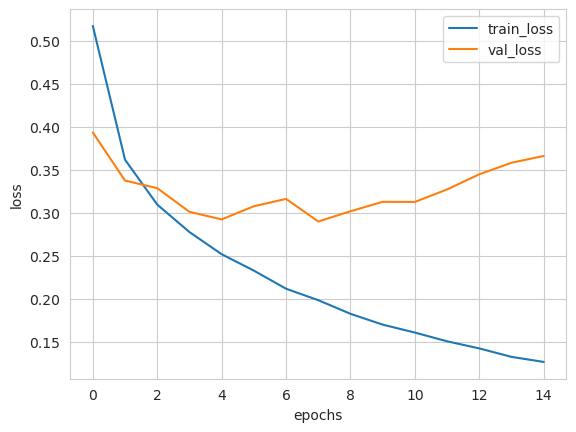

In [10]:
# plot the loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

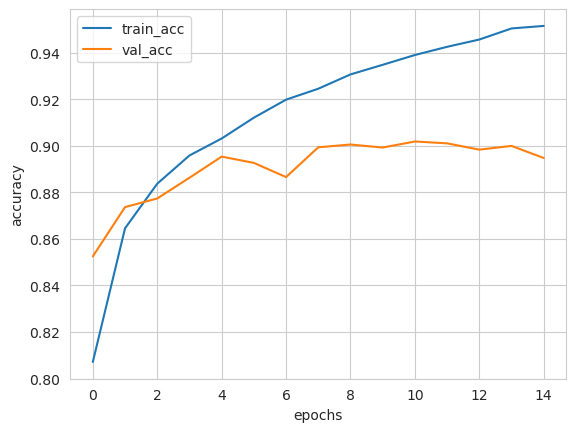

In [11]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();

In [12]:
# evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3661 - accuracy: 0.8948


[0.36608079075813293, 0.8948000073432922]

In [13]:
# make predictions
pred_logits = model.predict(X_test)

# convert probabilities to labels
y_pred = np.argmax(pred_logits, axis=1)
y_pred

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, ..., 8, 1, 5])

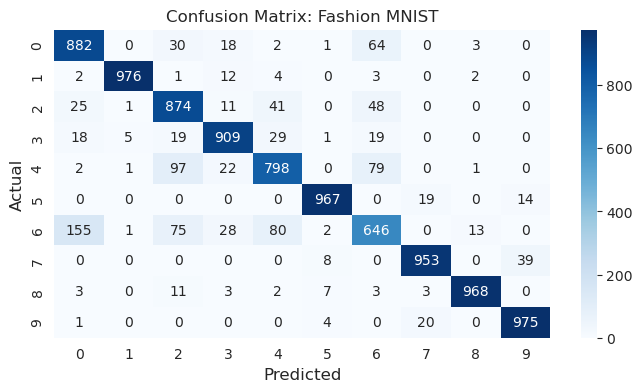

In [14]:
# utility function
# plot confusion matrix using sns heatmap
def plot_confusion_matrix(cf_matrix, title, xlabel='Predicted', ylabel='Actual', ticklabels=None, figsize=(8,4), fontdict={'fontsize':12}):
    
    # extract counts from confusion matrix
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    
    # create annotations for plot
    annotations = [f'{count}'.format(count) for count in group_counts]
    annotations = np.asarray(annotations).reshape(cf_matrix.shape)

    plt.figure(figsize = figsize, dpi=100)
    ax = sns.heatmap(cf_matrix, annot=annotations, fmt='', cmap='Blues')

    # set title
    ax.set_title(title, fontdict=fontdict)
    
    # set axes labels
    ax.set_xlabel(xlabel, fontdict=fontdict)
    ax.set_ylabel(ylabel, fontdict=fontdict)

    # tick labels - List must be in alphabetical order
    if ticklabels:
        # set axes tick labels
        ax.xaxis.set_ticklabels(ticklabels)
        ax.yaxis.set_ticklabels(ticklabels)

    # display the visualization of the confusion matrix.
    plt.show()


# plot the confusion matrix
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred),
    'Confusion Matrix: Fashion MNIST',
)

In [15]:
# list of the label names
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

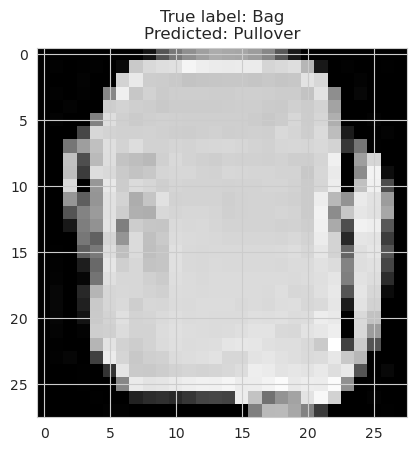

In [16]:
# show some misclassified examples
# extract all index which are misclassified
misclassified_idx = np.where(y_pred != y_test)[0]

# randomly choose one misclassified example
idx = np.random.choice(misclassified_idx)

plt.imshow(X_test[idx], cmap='gray')
plt.title(f'True label: {labels[y_test[idx]]}\nPredicted: {labels[y_pred[idx]]}');